# Run the whole deltas algorithm

In [66]:
%load_ext autoreload
%autoreload 2

import ipywidgets
import pipeline
import model_deltas
import plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [67]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-2, -2],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )


## Get Classifier

clf


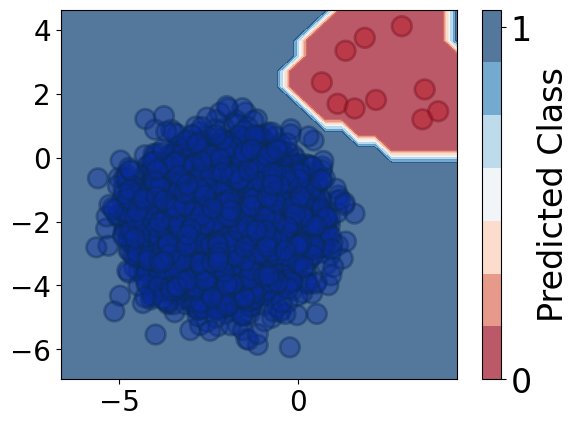

SMOTE


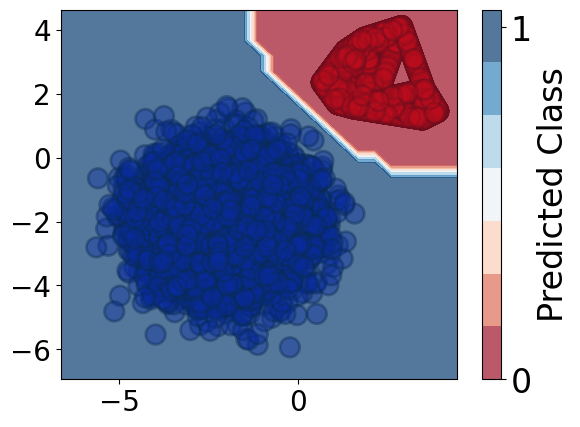

In [68]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

data_clf['clf'], clf_SMOTE = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [69]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[0.61660059]])

## Fit deltas

deltas init: [1, 0.5199359532642149]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.005005005005006 
    delta2: 0.5818029777717261
    constraint satisfied: True


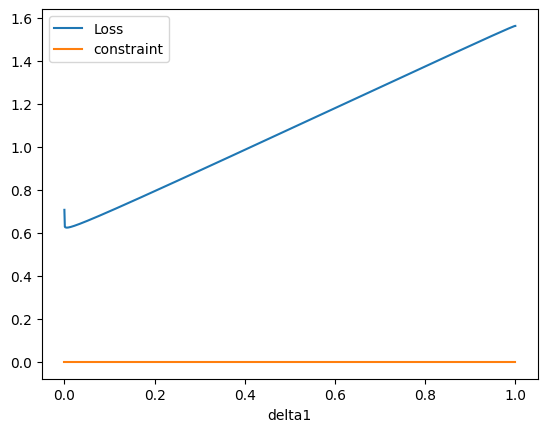

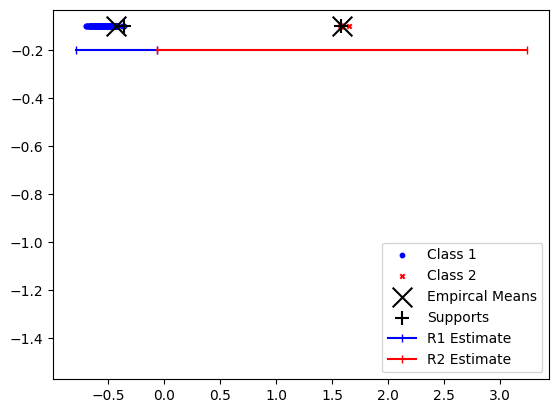

In [70]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.base_deltas(clf).fit(X, y, _print=True, _plot=True)

## Plot training data information

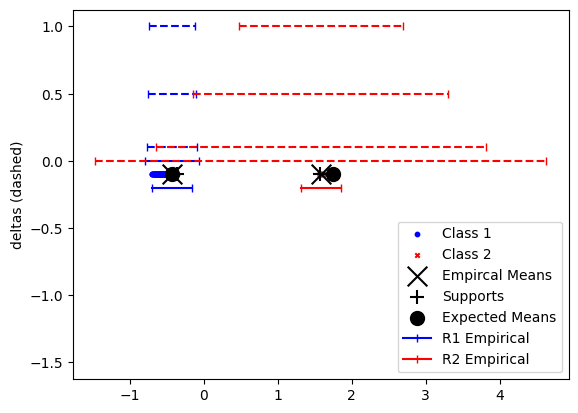

In [71]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## See how classifier's boudnary changes with delta

In [72]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [73]:
deltas_model.print_params()

Parameters
                R:  1.650002895348728
                N1: 10000
                N2: 10
                R1: 0.27383712778637126
                R2: 0.06543851000920187
                M:  1.9376438286577604
                D:  2.012596512926514
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.94595
deltas accuracy: 0.9845
SMOTE accuracy: 0.9719

original F1: 0.9428616734499708
deltas F1: 0.984255967496191
SMOTE F1: 0.9710875604486058

original precision0: 0.9024456276509341
deltas precision0: 0.9699321047526673
SMOTE precision0: 0.946790380609733

original precision1: 1.0
deltas precision1: 1.0
SMOTE precision1: 1.0



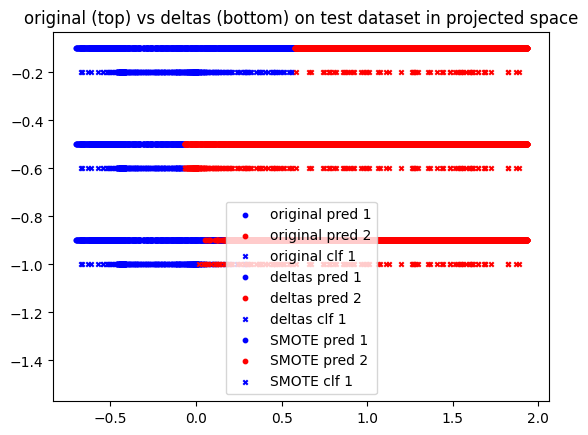

original


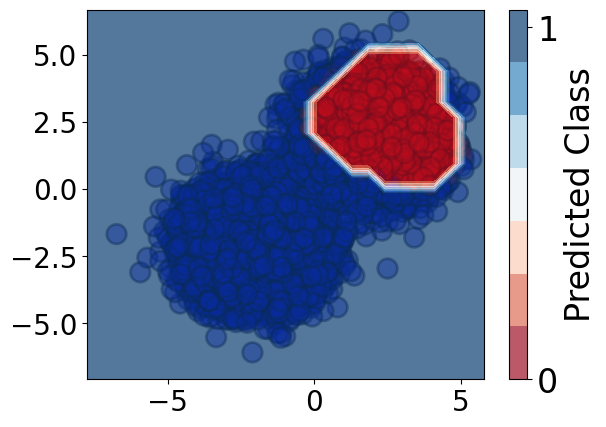

deltas


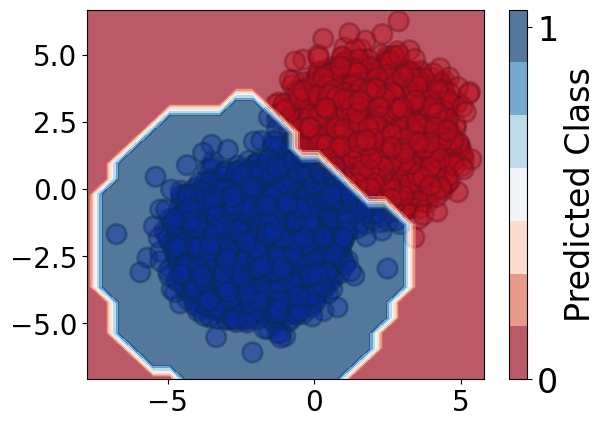

SMOTE


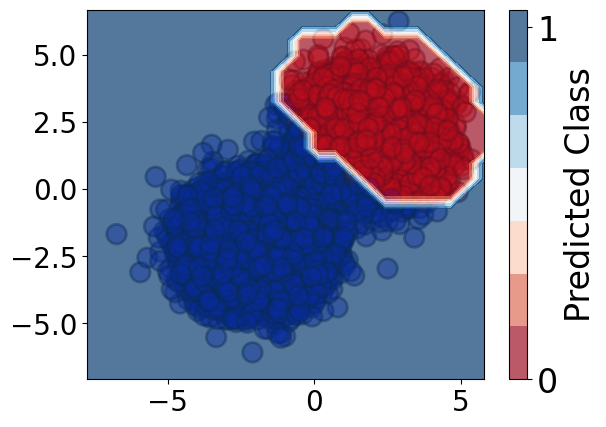

In [74]:
mdels = {
    'original': clf,
    'deltas': deltas_model,
    'SMOTE': clf_SMOTE,
         }
pipeline.eval_test_new(mdels,
                       data_clf['data_test'], _print=True, _plot=True)